# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [40]:
#Your code here 

import json
import pandas as pd

f = open('disease_data.json', 'r')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [78]:
#Your code here
data.keys()

# for item in data['meta']['view']['columns']:
#     print(item['name'], type(item))

# for item in data['data']:
#     print(item)

#data['data']  # It's a list!

# for item in data['data'][0]:
#     print(item, type(item))
    
#data.keys()


columns = [x['name'] for x in data['meta']['view']['columns']]
print(columns)


    


['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']
sid                                                                          2
id                                        F4468C3D-340A-4CD2-84A3-DF554DFF065E
position                                                                     2
created_at                         

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [107]:
#Your code here
df = pd.DataFrame(data['data'])
df.columns = columns

df.columns


Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [247]:
df.columns

ast_df = df[df["Topic"] == "Asthma"]
ast_df.columns
print(ast_df['Question'][4725])

ast18_df = ast_df[ast_df['Question'] == "Current asthma prevalence among adults aged >= 18 years"]
pd.set_option('display.max_columns', None)  # MAGIC!!

ast18_df

#ast18sorted_df = ast18_df[['YearEnd', 'LocationDesc','DataValue']].sort_values('LocationDesc')
overall_df = ast18_df[(ast18_df['StratificationCategoryID1'] == "OVERALL") & 
                      (ast18_df['DataValueType'] == "Crude Prevalence")]  # HARD TO FIND 
overall_df.head()

#overall_ast_states_df = overall_df  # FOR NOW
overall_ast_states_df = overall_df[['LocationDesc', 'DataValue']]

#overall_ast_states_df.plot(x='DataValue', y='LocationDesc')
overall_ast_states_df.isna().sum()

overall_ast_states_df.shape  
overall_ast_states_df.sort_values(by=['DataValue']) 




Current asthma prevalence among adults aged >= 18 years


,LocationDesc,DataValue
9407,Oklahoma,10
9385,Indiana,10.2
9416,Vermont,10.2
9392,Massachusetts,10.3
9377,Connecticut,10.5
9408,Oregon,10.5
9409,Pennsylvania,10.6
9423,Puerto Rico,10.7
9410,Rhode Island,10.7
9382,Hawaii,10.7


Text(0.5, 1.0, 'Asthma Over Age 18 by State')

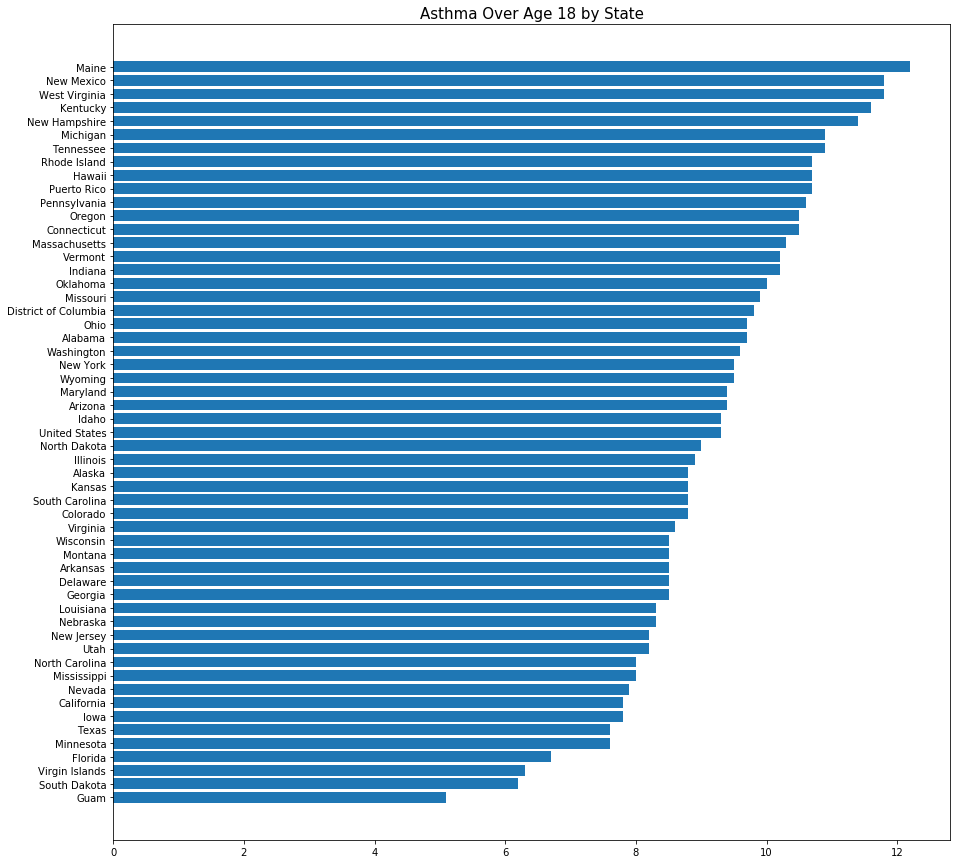

In [257]:
import matplotlib.pyplot as plt
%matplotlib inline

overall_ast_states_df['DataValue'] = overall_ast_states_df['DataValue'].astype('float')

overall_ast_states_df = overall_ast_states_df.sort_values(['DataValue'])


fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(overall_ast_states_df['LocationDesc'], overall_ast_states_df['DataValue'])

ax.set_title("Asthma Over Age 18 by State", fontsize=15)

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!